## Q1. 
## What is the mathematical formula for a linear SVM?

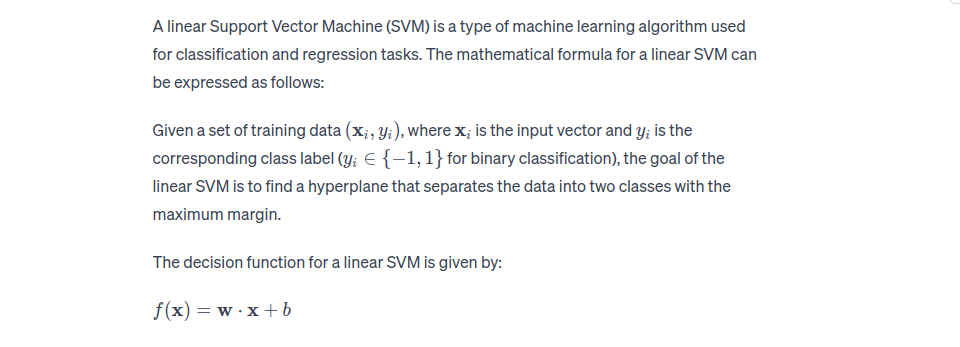

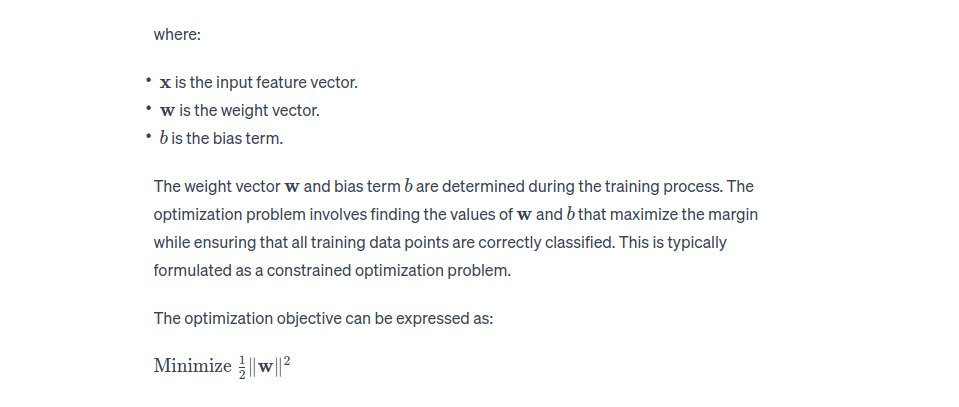

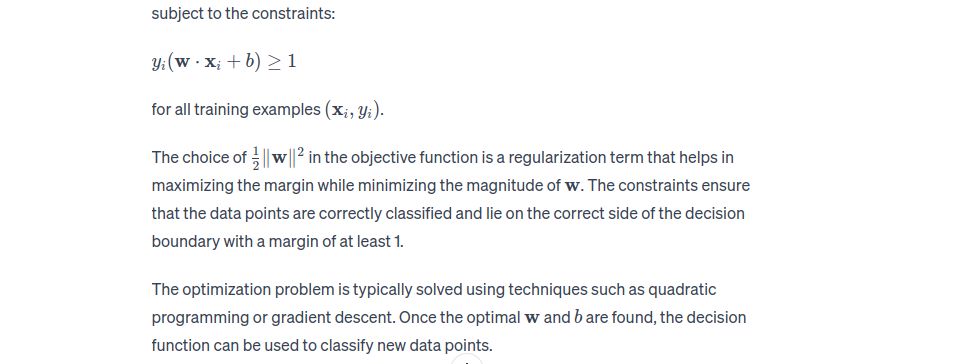

## Q2. 
## What is the objective function of a linear SVM?

The objective function of a linear Support Vector Machine (SVM) is typically formulated as a minimization problem with the goal of finding the optimal hyperplane that separates the data into different classes while maximizing the margin. The objective function for a linear SVM is:

\[ \text{Minimize } \frac{1}{2} \| \mathbf{w} \|^2 \]

subject to the constraints:

\[ y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \]

for all training examples \((\mathbf{x}_i, y_i)\).

Here:
- \( \mathbf{w} \) is the weight vector associated with the decision hyperplane.
- \( b \) is the bias term.
- \( \mathbf{x}_i \) is the input vector of the \(i\)-th training example.
- \( y_i \) is the class label of the \(i\)-th training example, with \(y_i \in \{-1, 1\}\) for binary classification.

The term \( \frac{1}{2} \| \mathbf{w} \|^2 \) is a regularization term, and the goal is to minimize this term. This term represents the squared Euclidean norm of the weight vector \( \mathbf{w} \), and minimizing it helps in achieving a large margin between the two classes.

The constraints \( y_i(\mathbf{w} \cdot \mathbf{x}_i + b) \geq 1 \) ensure that each data point is correctly classified and lies on the correct side of the decision boundary with a margin of at least 1. These constraints are derived from the geometric interpretation of the margin in SVMs.

The optimization problem is typically solved using techniques such as quadratic programming or gradient descent to find the optimal values for \( \mathbf{w} \) and \( b \) that satisfy the constraints while minimizing the regularization term. Once the optimization is performed, the resulting \( \mathbf{w} \) and \( b \) define the hyperplane that maximizes the margin between the classes in the feature space.

## Q3.
## What is the kernel trick in SVM?

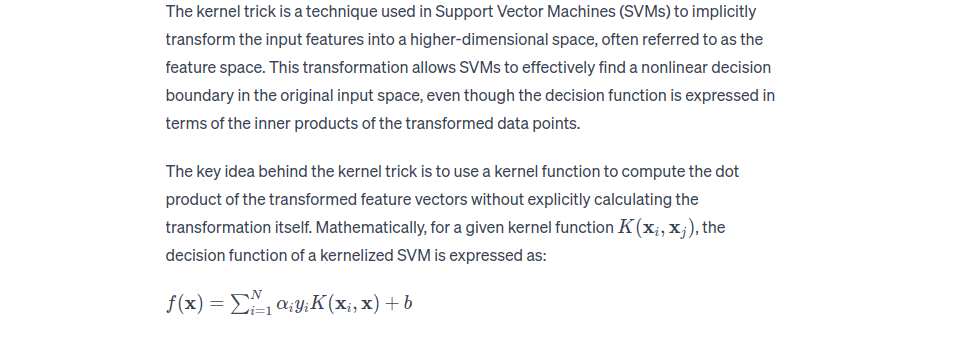

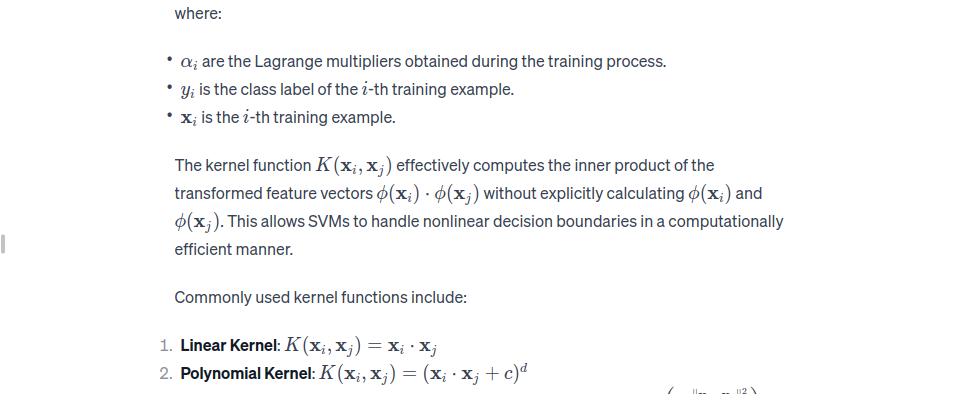

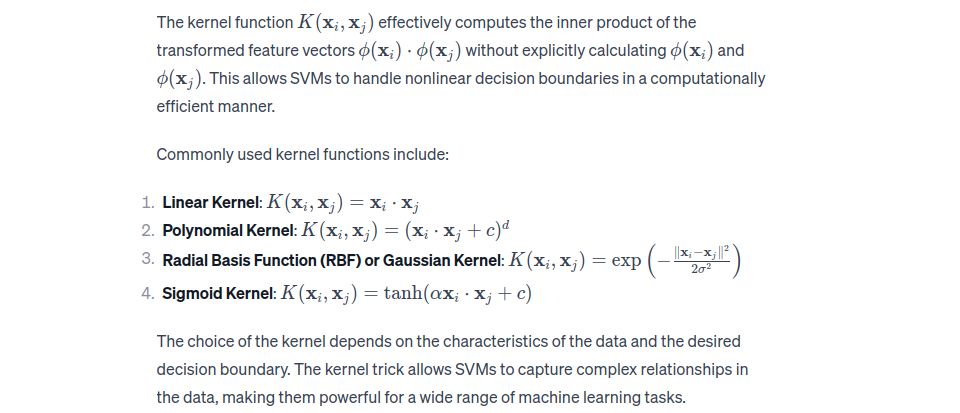

## Q4.
## What is the role of support vectors in SVM Explain with example

In Support Vector Machines (SVMs), support vectors are the data points that play a crucial role in defining the decision boundary (hyperplane) between different classes. These are the instances that are closest to the decision boundary and have the potential to influence the position and orientation of the boundary. Support vectors are the data points that are either on the margin or are misclassified, and they determine the optimal hyperplane during the training process.

The role of support vectors in SVM can be understood by considering the optimization objective of SVMs, which involves finding the hyperplane that maximizes the margin between the classes while correctly classifying the training data. The decision function of a linear SVM can be expressed as:

\[ f(\mathbf{x}) = \sum_{i=1}^{N} \alpha_i y_i \langle \mathbf{x}_i, \mathbf{x} \rangle + b \]

Here, \(\alpha_i\) are the Lagrange multipliers obtained during the training process, \(y_i\) is the class label of the \(i\)-th training example, \(\mathbf{x}_i\) is the \(i\)-th training example, and \(\langle \mathbf{x}_i, \mathbf{x} \rangle\) denotes the inner product.

The support vectors are the data points corresponding to non-zero \(\alpha_i\). These are the critical points that contribute to the decision function and, consequently, the positioning of the hyperplane. The non-zero \(\alpha_i\) indicate that these points are either on the margin or are misclassified.

Let's consider a simple example with two classes, +1 and -1, in a two-dimensional space. The support vectors are typically the instances from both classes that are closest to the decision boundary. The decision boundary is determined by the support vectors, and their influence extends to the entire dataset.

For instance, imagine a binary classification problem where you have two classes represented by red and blue points in a 2D space. The support vectors might be the points on the edge or within the margin of the separation between the classes. The optimal hyperplane would be positioned to maximize the margin between these support vectors.

In summary, support vectors are critical data points that determine the position and orientation of the decision boundary in SVMs. They are the points that, if removed or altered, would potentially change the position of the hyperplane. SVMs are designed to be robust to outliers, and the focus on support vectors contributes to the model's ability to generalize well to new, unseen data.

## Q5. 
## Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

Sure, let's visualize the concepts of Hyperplane, Marginal Plane, Soft Margin, and Hard Margin in SVM using a simple example in a two-dimensional space.

Consider a binary classification problem with two classes, +1 and -1. We'll use a linear kernel for simplicity.

### Example:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate random data
np.random.seed(42)
X = np.random.rand(20, 2) * 2 - 1  # 20 points in a 2D space
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)  # Simple linear decision boundary

# Create SVM models with different margins
clf_hard_margin = svm.SVC(kernel='linear', C=float('inf'))  # Hard Margin
clf_soft_margin = svm.SVC(kernel='linear', C=1.0)  # Soft Margin

# Fit models
clf_hard_margin.fit(X, y)
clf_soft_margin.fit(X, y)

# Plotting
plt.figure(figsize=(12, 4))

# Hard Margin SVM
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf_hard_margin.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(clf_hard_margin.support_vectors_[:, 0], clf_hard_margin.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', marker='o')

plt.title('Hard Margin SVM')

# Soft Margin SVM
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf_soft_margin.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.scatter(clf_soft_margin.support_vectors_[:, 0], clf_soft_margin.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', marker='o')

plt.title('Soft Margin SVM')

plt.tight_layout()
plt.show()
```

This example generates random data points and uses two SVM models, one with a hard margin (C=float('inf')) and one with a soft margin (C=1.0).

### Explanation:

- **Hard Margin SVM:**
  - In the left subplot, the black solid line represents the hyperplane, which is the decision boundary.
  - The dashed lines on either side of the hyperplane represent the margins.
  - The support vectors are the circled points on the margins.

- **Soft Margin SVM:**
  - In the right subplot, the black solid line again represents the hyperplane.
  - The dashed lines represent the "soft margins" allowing for some misclassification.
  - The support vectors are again the circled points on the margins.

You can observe that the hard margin SVM is more sensitive to outliers and noise in the data, whereas the soft margin SVM allows for some misclassification to create a more robust model. The choice of the margin (hard or soft) depends on the specific characteristics of the dataset.

## Q6. 
## SVM Implementation through Iris dataset.

- Load the iris dataset from the scikit-learn library and split it into a training set and a testing set.

- Train a linear SVM classifier on the training set and predict the labels for the testing set.

- Compute the accuracy of the model on the testing set.

- Plot the decision boundaries of the trained model using two of the features.

- Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# For simplicity, we'll perform binary classification
# Consider only the first two classes (0 and 1)
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train the SVM model
svm_model.fit(X_train_std, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_std)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

# Visualize the decision boundary (for simplicity, use only two features)
plt.figure(figsize=(8, 6))

h = 0.02  # Step size in the mesh
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
# Plot the testing points
plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', s=100, edgecolors='k')

plt.title('SVM Decision Boundary on Iris Dataset')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Consider only the first two classes (0 and 1) for binary classification
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Linear SVM classifier from scratch
class LinearSVM:
    def __init__(self, learning_rate=0.01, epochs=1000, C=1.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.C = C

    def fit(self, X, y):
        self.X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
        self.y = 2 * y - 1  # Convert 0s to -1s
        self.weights = np.zeros(self.X.shape[1])

        for epoch in range(self.epochs):
            margin = 1 - self.y * np.dot(self.X, self.weights)
            gradient = self.weights + self.C * np.sum(np.where(margin > 0, -self.y[:, None] * self.X, 0), axis=0)
            self.weights -= self.learning_rate * gradient

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.sign(np.dot(X, self.weights))

# Train linear SVM from scratch
svm_from_scratch = LinearSVM(learning_rate=0.01, epochs=1000, C=1.0)
svm_from_scratch.fit(X_train_std, y_train)

# Make predictions
y_pred_scratch = svm_from_scratch.predict(X_test_std)

# Train linear SVM using scikit-learn
from sklearn.svm import SVC
svm_sklearn = SVC(kernel='linear', C=1.0)
svm_sklearn.fit(X_train_std, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test_std)

# Compare performance
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print("Accuracy (from scratch):", accuracy_scratch)
print("Accuracy (scikit-learn):", accuracy_sklearn)

# Visualize decision boundary for scikit-learn SVM
plt.figure(figsize=(8, 6))

h = 0.02
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_sklearn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
# Plot the testing points
plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', s=100, edgecolors='k')

plt.title('Scikit-learn SVM Decision Boundary')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Sepal Width (standardized)')
plt.show()


## Completed_6th_April_Assignment:
## ______________________________